In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error


# Common imports
import numpy as np
import pandas as pd
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

brain = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_in_numeric_without_useless_data.csv')
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [6]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))


MSE: 0.04514472417313834


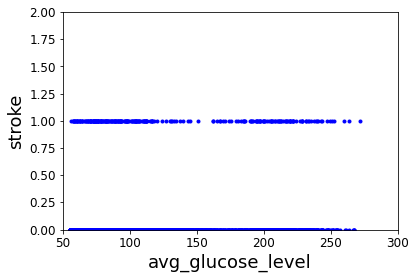

In [7]:
plt.plot(X.iloc[:, 5], y, "b.")
plt.xlabel("avg_glucose_level", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([50, 300, 0, 2])
plt.show()

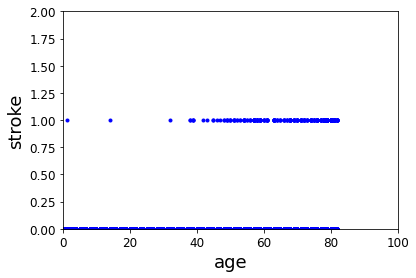

In [8]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("age", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([0, 100, 0, 2])
plt.show()

In [9]:
X = brain_pca.iloc[:, :2]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test,  y_pred))

MSE: 0.046745857214450195


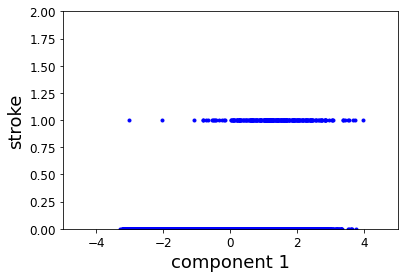

In [10]:
plt.plot(X.iloc[:, 0], y, "b.")
plt.xlabel("component 1", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

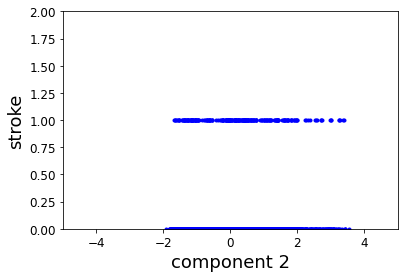

In [11]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("component 2", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

In [12]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

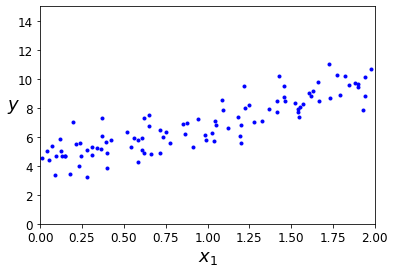

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

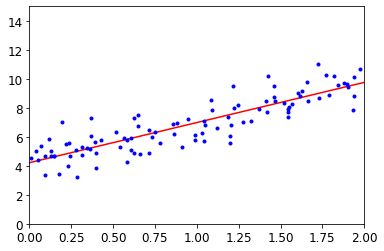

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [20]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [21]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [22]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100      #batch size is 100 samples      

theta = np.random.randn(2,1)  # random initialization of the weights
#
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)# This is the gradient descent iteration  - m is for the batch version
    theta = theta - eta * gradients                # theta are the weights and updated acording to the gradient descent

In [23]:
theta

array([[4.21509616],
       [2.77011339]])

In [24]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

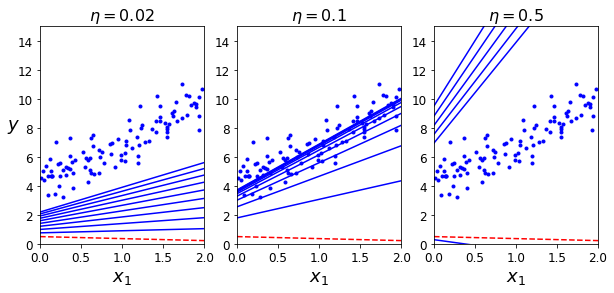

In [25]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

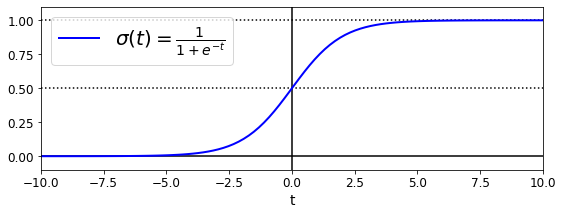

In [26]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [27]:
X = brain.iloc[:, 8:]  # petal width
y = (brain.iloc[:, 8]).astype(np.int64)  # 1 if Iris virginica, else 0

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


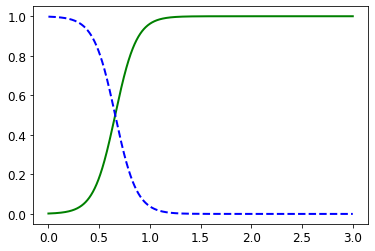

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="com1")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="com2")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


InvalidIndexError: (slice(None, None, None), None)

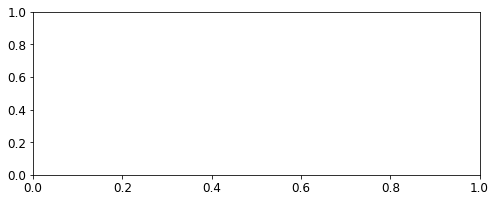

In [31]:
from matplotlib.colors import ListedColormap
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="com1")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="com2")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("com1", fontsize=14)
plt.ylabel("com2", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()